## An illustrative example of protein-protein interaction: Two-component PhoB-PhoR system in E. coli

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
#%matplotlib inline
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
import pingouin as pg

#print(sklearn.__version__)
import import_ipynb
from PPI_functions import *
from scipy.stats import ks_2samp

from statsmodels.stats.weightstats import ztest as ztest

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


1.25.2
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]
importing Jupyter notebook from PPI_functions.ipynb
1.25.2
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]


In [8]:
# Extract propy descriptors
#Descriptors_complete('TCS_3proteins.txt','TCS_descriptors.csv')

In [9]:
df=pd.read_csv('TCS_descriptors.csv')
df1=df.drop(columns=['Unnamed: 0'])
df1

,net_charge,AMP_Name,A,R,N,D,C,E,Q,G,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,2,PhoR,5.000,5.000,1.667,1.667,3.333,3.333,0.000,5.000,...,0.027691,0.027704,0.024517,0.028898,0.026423,0.027024,0.029425,0.023882,0.024290,0.028707
1,6,PhoB,3.333,13.333,3.333,1.667,0.000,8.333,3.333,11.667,...,0.033213,0.035060,0.036064,0.029299,0.027465,0.027153,0.027941,0.022738,0.019890,0.020201
2,3,NarL,1.667,10.000,10.000,3.333,1.667,5.000,6.667,6.667,...,0.025952,0.023102,0.026654,0.030634,0.017533,0.020648,0.028682,0.023986,0.025309,0.021938


In [41]:
selected_columns = df1.loc[:,'AA':'VV']
selected_columns = df1.loc[:, ['AMP_Name'] + list(df1.loc[:, 'AA':'VV'].columns) ]
#selected_columns = selected_columns.loc[:, ~(selected_columns == 0).all()]
selected_columns

,AMP_Name,AA,AR,AN,AD,AC,AE,AQ,AG,AH,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,PhoR,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,1.69,0.0,0.00,0.0,0.0,0.0,1.69,0.0,0.0,0.00
1,PhoB,0.0,0.0,0.0,0.0,0.0,1.69,0.00,0.0,0.0,...,1.69,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,1.69
2,NarL,0.0,0.0,0.0,0.0,0.0,0.00,1.69,0.0,0.0,...,1.69,0.0,1.69,0.0,0.0,0.0,0.00,0.0,0.0,0.00


In [70]:
df=selected_columns
phor_values = df[df['AMP_Name'] == 'PhoR'].iloc[0, 1:].values
narl_values = df[df['AMP_Name'] == 'NarL'].iloc[0, 1:].values
phob_values = df[df['AMP_Name'] == 'PhoB'].iloc[0, 1:].values

t_stat, p_value = stats.ttest_rel(phor_values, phob_values)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("The differences in dipeptide compositions between PhoR-NarL and PhoR-PhoB are statistically significant.")
else:
    print("There is no significant difference in dipeptide compositions between PhoR-NarL and PhoR-PhoB.")


T-statistic: 0.09805916424615786
P-value: 0.9219345543115403
There is no significant difference in dipeptide compositions between PhoR-NarL and PhoR-PhoB.


In [55]:
df=selected_columns
# Extract the rows for 'PhoR' and 'PhoB'
phor_values = df[df['AMP_Name'] == 'PhoR'].iloc[0, 1:].values
NarL_values = df[df['AMP_Name'] == 'PhoB'].iloc[0, 1:].values

# Compare the two rows
similar_entries = (phor_values != NarL_values).sum()

# Calculate the fraction of similar dipeptides
fraction_similar = similar_entries / (df.shape[1] - 1)  # Subtract 1 for 'AMP_Name' column

print(f"Fraction of dipeptides in terms of which 'PhoR' and 'NarL' are not similar: {fraction_similar:.2f}")

Fraction of dipeptides in terms of which 'PhoR' and 'NarL' are not similar: 0.65


In [56]:
import pandas as pd



# Compute differences for 'PhoR-NarL' and 'PhoRB'
phor_values = df[df['AMP_Name'] == 'PhoR'].iloc[0, 1:].values
narl_values = df[df['AMP_Name'] == 'NarL'].iloc[0, 1:].values
phob_values = df[df['AMP_Name'] == 'PhoB'].iloc[0, 1:].values

phor_narl_diff = np.abs(phor_values - narl_values)

phorb_diff = np.abs(phor_values - phob_values)

# Construct the resulting dataframe
result_df = pd.DataFrame([phor_narl_diff, phorb_diff], columns=df.columns[1:])
result_df['AMP_Name'] = ['PhoR-NarL', 'PhoRB']
result_df = result_df[['AMP_Name'] + [col for col in result_df if col != 'AMP_Name']]  # Reorder columns

result_df


,AMP_Name,AE,AQ,AF,AS,AV,RR,RN,RD,RE,...,WW,WV,YG,YL,YP,VD,VL,VM,VT,VV
0,PhoR-NarL,0.00,1.69,3.39,1.69,0.00,0.00,0.00,1.69,0.00,...,1.69,1.69,0.00,0.00,1.69,1.69,0.0,1.69,1.69,0.00
1,PhoRB,1.69,0.00,3.39,1.69,1.69,1.69,1.69,0.00,1.69,...,1.69,1.69,1.69,1.69,0.00,1.69,0.0,0.00,1.69,1.69


In [59]:
import scipy.stats as stats
df=result_df
df_diff = df.set_index('AMP_Name').transpose()

# Assuming df_diff has been created as previously shown
phor_narl_diffs = df_diff['PhoR-NarL'].values
phor_phob_diffs = df_diff['PhoRB'].values

t_stat, p_value = stats.ttest_rel(phor_narl_diffs, phor_phob_diffs)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The differences in dipeptide compositions between PhoR-NarL and PhoR-PhoB are statistically significant.")
else:
    print("There is no significant difference in dipeptide compositions between PhoR-NarL and PhoR-PhoB.")


T-statistic: 0.002833797876437059
P-value: 0.9977434411730247
There is no significant difference in dipeptide compositions between PhoR-NarL and PhoR-PhoB.


In [61]:
phor_phob_diffs

array([1.69, 0.  , 3.39, 1.69, 1.69, 1.69, 1.69, 0.  , 1.69, 1.69, 0.  ,
       5.08, 1.69, 0.  , 3.39, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.69,
       0.  , 1.69, 0.  , 0.  , 0.  , 1.69, 1.69, 1.69, 0.  , 1.69, 1.69,
       0.  , 0.  , 0.  , 1.69, 1.69, 0.  , 0.  , 0.  , 1.69, 1.69, 0.  ,
       0.  , 1.69, 1.69, 0.  , 1.69, 1.69, 0.  , 1.69, 1.69, 1.69, 0.  ,
       1.69, 0.  , 1.69, 1.69, 1.69, 1.69, 0.  , 0.  , 1.69, 3.39, 0.  ,
       1.69, 0.  , 5.09, 0.  , 1.7 , 3.39, 1.69, 1.69, 1.69, 1.69, 1.7 ,
       1.69, 0.  , 1.69, 1.69, 1.69, 1.69, 1.69, 1.69, 1.69, 1.69, 0.  ,
       0.  , 1.69, 1.69, 1.69, 0.  , 1.69, 1.69, 1.69, 1.69, 0.  , 1.69,
       1.69, 1.69, 1.7 , 1.69, 0.  , 1.69, 0.  , 1.69, 1.69, 1.69, 1.69,
       0.  , 1.69, 1.69, 1.69, 1.69, 1.69, 0.  , 1.69, 1.69, 1.69, 1.69,
       0.  , 1.69, 0.  , 0.  , 1.69, 1.69])

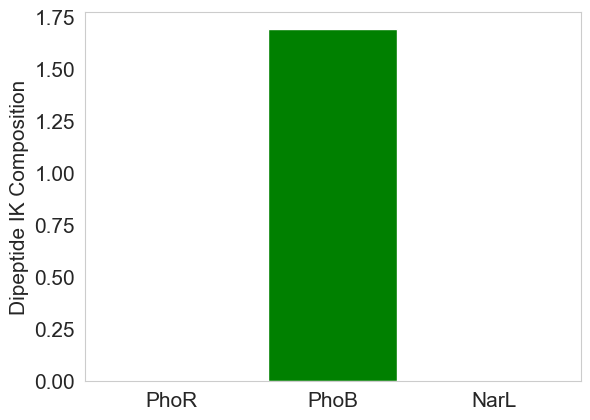

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the bar plot
plt.bar(df1['AMP_Name'], df1['IK'], color='green')
#plt.xlabel('AMP Names')
plt.ylabel('Dipeptide IK Composition', fontsize=15)
plt.grid(False)  # Turn off the grid
plt.tick_params(labelsize=15)
plt.savefig('IK.pdf', bbox_inches = 'tight',pad_inches = 0)
plt.show()


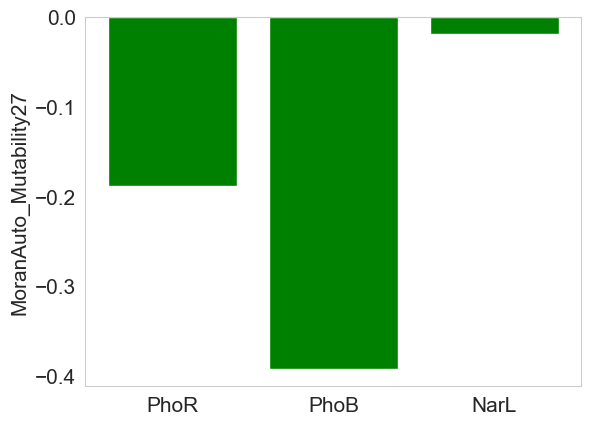

In [54]:


# Plotting the bar plot
plt.bar(df1['AMP_Name'], df1['MoranAuto_Mutability27'], color='green')
#plt.xlabel('AMP Names')
plt.ylabel('MoranAuto_Mutability27', fontsize=15)
plt.grid(False)  # Turn off the grid
plt.tick_params(labelsize=15)
plt.savefig('MoranAuto_Mutability27.pdf', bbox_inches = 'tight',pad_inches = 0)
plt.show()


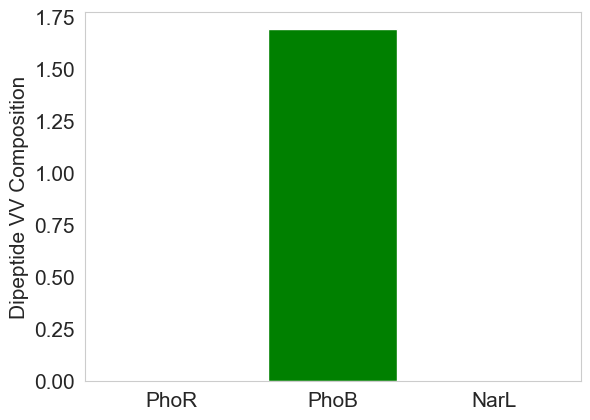

In [71]:



# Plotting the bar plot
plt.bar(df1['AMP_Name'], df1['VV'], color='green')
#plt.xlabel('AMP Names')
plt.ylabel('Dipeptide VV Composition', fontsize=15)
plt.grid(False)  # Turn off the grid
plt.tick_params(labelsize=15)
plt.savefig('VV.pdf', bbox_inches = 'tight',pad_inches = 0)
plt.show()


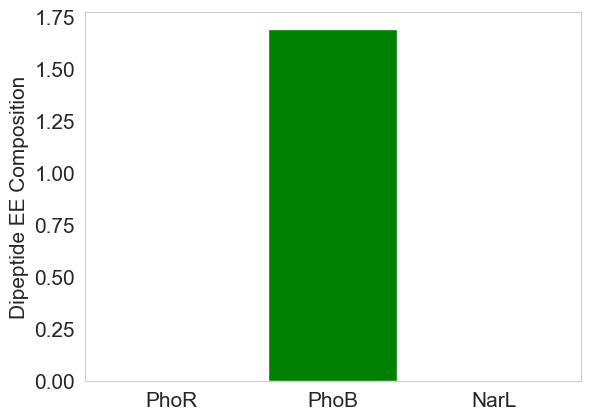

In [78]:


# Plotting the bar plot
plt.bar(df1['AMP_Name'], df1['EE'], color='green')
#plt.xlabel('AMP Names')
plt.ylabel('Dipeptide EE Composition', fontsize=15)
plt.grid(False)  # Turn off the grid
plt.tick_params(labelsize=15)
plt.savefig('EE.pdf', bbox_inches = 'tight',pad_inches = 0)
plt.show()


In [ ]:
PAAC11

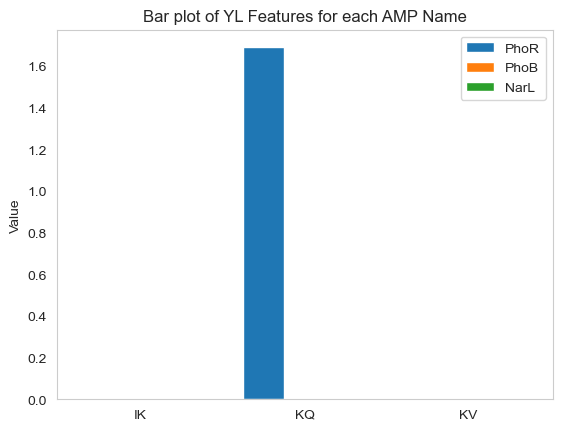

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
feature1='IK'
feature2='KQ'
feature3='KV'



# Bar width and positions
bar_width = 0.25
r1 = np.arange(len(df1[feature1]))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
plt.bar(r1, df1[feature1], width=bar_width, label=df1['AMP_Name'][0])
plt.bar(r2, df1[feature2], width=bar_width, label=df1['AMP_Name'][1])
plt.bar(r3, df1[feature3], width=bar_width, label=df1['AMP_Name'][2])

# Adjusting the x-axis
#plt.xlabel('Feature Names', fontweight='bold')
feature_labels = [feature1, feature2, feature3]
plt.xticks([r + bar_width for r in range(len(df1[feature1]))], feature_labels)

plt.ylabel('Value')
plt.title('Bar plot of YL Features for each AMP Name')
plt.grid(False)  # Turn off the grid
plt.legend()
plt.show()
